In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
traindata = pd.read_csv('kdd_train.csv')
testdata = pd.read_csv('kdd_test.csv')

In [3]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
categ = ['protocol_type','service','flag']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
#data[categ] = testdata[categ].apply(le.fit_transform)

In [6]:
labels=[]
for i in data['labels']:
    if i=='normal':
        labels.append(0)
    else:
        labels.append(1)
data['labels']=labels

In [7]:
X = data.iloc[:,1:42]
Y = data['labels']

In [8]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [9]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [10]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [11]:
cnn = Sequential()
cnn.add(Convolution1D(128, 3 ,activation="relu",input_shape=(40, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="sigmoid"))


In [12]:
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

In [13]:
checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

In [14]:

history=cnn.fit(X_train, Y_train, epochs=75,verbose=1,batch_size=500,validation_data=(X_test, Y_test),callbacks=[checkpointer])

Epoch 1/75
238/238 [==============================] - 10s 39ms/step - loss: 0.2238 - accuracy: 0.9125 - val_loss: 0.1657 - val_accuracy: 0.9381
Epoch 2/75
238/238 [==============================] - 9s 39ms/step - loss: 0.1539 - accuracy: 0.9420 - val_loss: 0.1335 - val_accuracy: 0.9471
Epoch 3/75
238/238 [==============================] - 11s 46ms/step - loss: 0.1306 - accuracy: 0.9507 - val_loss: 0.1164 - val_accuracy: 0.9542
Epoch 4/75
238/238 [==============================] - 11s 45ms/step - loss: 0.1167 - accuracy: 0.9552 - val_loss: 0.1077 - val_accuracy: 0.9556
Epoch 5/75
238/238 [==============================] - 10s 42ms/step - loss: 0.1049 - accuracy: 0.9588 - val_loss: 0.0912 - val_accuracy: 0.9620
Epoch 6/75
238/238 [==============================] - 10s 40ms/step - loss: 0.0945 - accuracy: 0.9623 - val_loss: 0.0831 - val_accuracy: 0.9647
Epoch 7/75
238/238 [==============================] - 10s 42ms/step - loss: 0.0886 - accuracy: 0.9648 - val_loss: 0.0759 - val_accuracy: 

238/238 [==============================] - 10s 41ms/step - loss: 0.0553 - accuracy: 0.9811 - val_loss: 0.0485 - val_accuracy: 0.9815
Epoch 34/75
238/238 [==============================] - 9s 39ms/step - loss: 0.0555 - accuracy: 0.9809 - val_loss: 0.0451 - val_accuracy: 0.9841
Epoch 35/75
238/238 [==============================] - 10s 41ms/step - loss: 0.0549 - accuracy: 0.9813 - val_loss: 0.0481 - val_accuracy: 0.9844
Epoch 36/75
238/238 [==============================] - 9s 39ms/step - loss: 0.0549 - accuracy: 0.9814 - val_loss: 0.0467 - val_accuracy: 0.9848
Epoch 37/75
238/238 [==============================] - 10s 41ms/step - loss: 0.0540 - accuracy: 0.9814 - val_loss: 0.0441 - val_accuracy: 0.9845
Epoch 38/75
238/238 [==============================] - 10s 41ms/step - loss: 0.0539 - accuracy: 0.9815 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 39/75
238/238 [==============================] - 10s 42ms/step - loss: 0.0529 - accuracy: 0.9819 - val_loss: 0.0431 - val_accuracy: 0.9850

Epoch 70/75
238/238 [==============================] - 10s 43ms/step - loss: 0.0475 - accuracy: 0.9847 - val_loss: 0.0388 - val_accuracy: 0.9875
Epoch 71/75
238/238 [==============================] - 10s 40ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 72/75
238/238 [==============================] - 10s 42ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 73/75
238/238 [==============================] - 10s 42ms/step - loss: 0.0474 - accuracy: 0.9844 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 74/75
238/238 [==============================] - 10s 41ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0383 - val_accuracy: 0.9879
Epoch 75/75
238/238 [==============================] - 10s 43ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0383 - val_accuracy: 0.9877


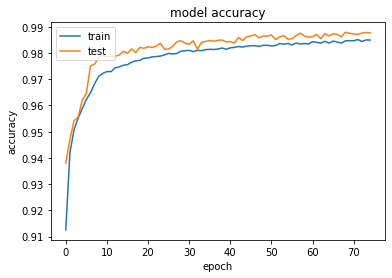

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

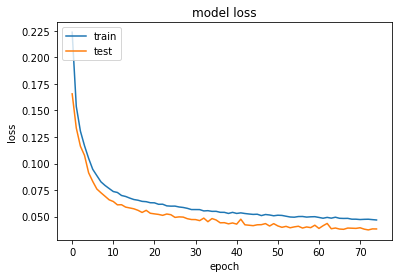

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
cnn.save("results/cnn1results/cnn_model.hdf5")